In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/optiver-trading-at-the-close/public_timeseries_testing_util.py
/kaggle/input/optiver-trading-at-the-close/train.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv
/kaggle/input/optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/optiver-trading-at-the-close/optiver2023/__init__.py


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import optuna

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import lightgbm as lgbm

optuna.logging.set_verbosity(optuna.logging.WARNING)
import warnings
warnings.filterwarnings('ignore')

from lightgbm import *
pd.set_option("display.max_columns", None)

In [3]:
import optiver2023
optiver2023.make_env.func_dict['__called__'] = False
env = optiver2023.make_env()
iter_test = env.iter_test()

In [4]:
train_data = pd.read_csv('../input/optiver-trading-at-the-close/train.csv')
test_data = pd.read_csv('../input/optiver-trading-at-the-close/example_test_files/test.csv')
sample_sub = pd.read_csv('../input/optiver-trading-at-the-close/example_test_files/sample_submission.csv')
rev_target = pd.read_csv('../input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv')

In [5]:
# 使えない特徴量とtargetを削除
x_train = train_data.drop(columns=['target', 'row_id', 'time_id', 'date_id'])
y_train = train_data['target'].values

In [6]:
lgbm_model = lgbm.LGBMRegressor(objective='mae', n_estimators=500, random_state=1234)
lgbm_model.fit(x_train, y_train)

LGBMRegressor(n_estimators=500, objective='mae', random_state=1234)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

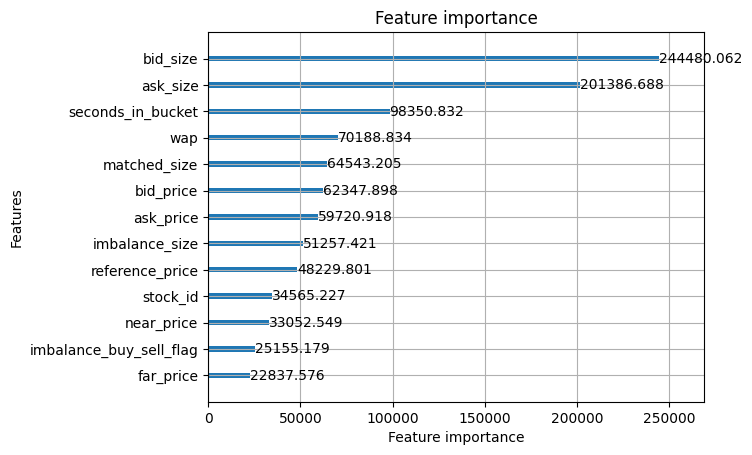

In [7]:
lgbm.plot_importance(lgbm_model, importance_type="gain")

In [8]:
counter = 0
for (test, revealed_targets, sample_prediction) in iter_test:
    sample_prediction['target'] = lgbm_model.predict(test.drop(columns=['row_id', 'date_id', 'currently_scored']))
    env.predict(sample_prediction)

    counter += 1

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
